In [79]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.metrics import classification_report

from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression,  Ridge,  Lasso,  ElasticNet

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Data exploration

In [80]:
data =pd.read_csv("./Alecsandru_M_Anca_Giorgiana_train.csv")
data.head(10)

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Beagle,10827.2179,NaN,13.1740,med,high,short,male,Salinas
1,Great Dane,53560.1661,80.1392,6.5349,med,high,short,male,Mccarthy
2,Beagle,8045.5414,35.7304,13.7290,med,high,short,female,Acevedo
3,Great Dane,54749.6569,78.7789,7.6049,med,high,short,male,Scott
4,Daschhund,11407.2729,20.2773,12.5856,high,med,short,female,Smith
5,Beagle,9551.9484,35.5791,13.2390,med,high,med,female,Wade
6,Beagle,10267.3042,34.1509,13.7514,med,high,short,female,Gross
7,Beagle,11590.5219,NaN,12.0457,med,high,short,male,Williams
8,English Setter,26824.0422,60.7637,12.4006,high,high,med,male,Ramos
9,Daschhund,10551.5257,21.3508,12.8164,high,med,short,male,Nelson


As can be observed from the plots below, the observations are not equally distributed. There are only a few observations with low Attention Needs or low Energy level.

In [81]:
print(data['Attention Needs'].value_counts())
print(data['Energy level'].value_counts())
print(data['Coat Lenght'].value_counts())
print(data['Sex'].value_counts())

high    694
med     277
low      29
Name: Attention Needs, dtype: int64
med     483
high    462
low      55
Name: Energy level, dtype: int64
short    708
med      271
long      21
Name: Coat Lenght, dtype: int64
male      516
female    484
Name: Sex, dtype: int64


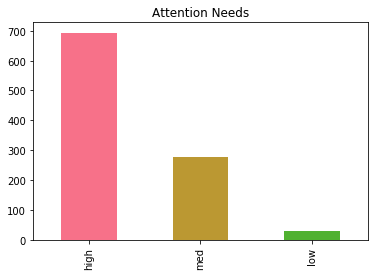

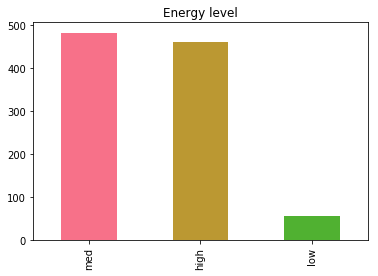

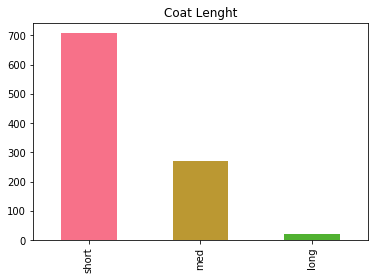

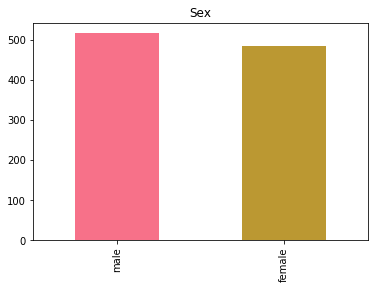

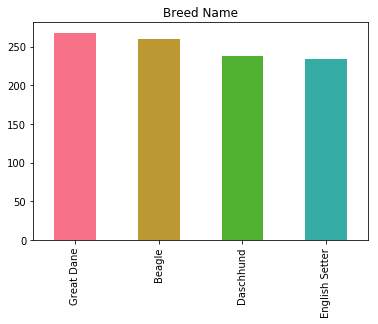

In [82]:
sns.set_palette("husl")
pd.value_counts(data['Attention Needs']).plot.bar()
plt.title('Attention Needs')
plt.show()

pd.value_counts(data['Energy level']).plot.bar()
plt.title('Energy level')
plt.show()

pd.value_counts(data['Coat Lenght']).plot.bar()
plt.title('Coat Lenght')
plt.show()


pd.value_counts(data['Sex']).plot.bar()
plt.title('Sex')
plt.show()



pd.value_counts(data['Breed Name']).plot.bar()
plt.title('Breed Name')
plt.show()


The only column with null values which will have to be filled in is Height, the dataset contains no duplicates so there is no need to drop any observations

In [83]:
data.describe()

,Weight(g),Height(cm),Longevity(yrs)
count,1000.000000,825.000000,1000.000000
mean,25188.756813,49.804229,11.288835
std,16894.866948,22.735331,2.780584
min,2711.579000,19.379600,5.230100
25%,10558.859425,33.030000,7.894300
50%,19263.401800,40.293300,12.509250
75%,45719.178825,76.127300,13.293300
max,58500.973700,83.951000,15.727200


In [84]:
data.duplicated().any()

False

In [85]:
data.isnull().any()

Breed Name         False
Weight(g)          False
Height(cm)          True
Longevity(yrs)     False
Energy level       False
Attention Needs    False
Coat Lenght        False
Sex                False
Owner Name         False
dtype: bool

There seems to be little difference between weight,height and longevity depending on the sex of the ,but rather on the breed 

In [86]:
data.groupby(['Breed Name','Sex']).mean()

Weight(g)  Height(cm)  Longevity(yrs)
Breed Name     Sex                                             
Beagle         female  10484.965776   35.609467       13.463322
               male    10782.326244   35.593491       13.623587
Daschhund      female  10035.070537   21.001549       12.933378
               male    10307.064683   20.959580       12.982857
English Setter female  28210.129530   61.832808       12.094493
               male    28243.952279   61.821337       11.948646
Great Dane     female  49866.112722   79.088277        6.920096
               male    50093.799843   79.046926        7.030118

In [87]:
print('Before')
data.head()


Before


,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Beagle,10827.2179,NaN,13.1740,med,high,short,male,Salinas
1,Great Dane,53560.1661,80.1392,6.5349,med,high,short,male,Mccarthy
2,Beagle,8045.5414,35.7304,13.7290,med,high,short,female,Acevedo
3,Great Dane,54749.6569,78.7789,7.6049,med,high,short,male,Scott
4,Daschhund,11407.2729,20.2773,12.5856,high,med,short,female,Smith


## Filling missing values in Height with mean value after breed

In [88]:
data['Height(cm)'] = data.groupby('Breed Name')['Height(cm)'].transform(lambda x: x.fillna(x.mean()))
print('After')
data.head()

After


,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Beagle,10827.2179,35.601257,13.1740,med,high,short,male,Salinas
1,Great Dane,53560.1661,80.139200,6.5349,med,high,short,male,Mccarthy
2,Beagle,8045.5414,35.730400,13.7290,med,high,short,female,Acevedo
3,Great Dane,54749.6569,78.778900,7.6049,med,high,short,male,Scott
4,Daschhund,11407.2729,20.277300,12.5856,high,med,short,female,Smith


In [89]:
data.describe()

,Weight(g),Height(cm),Longevity(yrs)
count,1000.000000,1000.000000,1000.000000
mean,25188.756813,49.907080,11.288835
std,16894.866948,22.727479,2.780584
min,2711.579000,19.379600,5.230100
25%,10558.859425,33.319225,7.894300
50%,19263.401800,56.236150,12.509250
75%,45719.178825,76.659200,13.293300
max,58500.973700,83.951000,15.727200


Analysing the distribution of the features,or if we have skewed data because it could mess
up the predictive model by affecting the regression intercept and the coefficients associated with the model.

From the correlation heatmap one can observe that Weight and Height are positively correlated whereas Longevity is negatively correlated with Height and Weight. Seems that smaller dogs live longer.

Text(0.5, 1.0, 'Weight distribution')

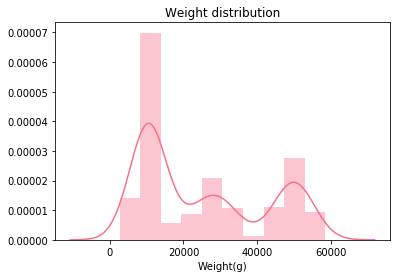

In [90]:
sns.distplot(data['Weight(g)'],bins=10).set_title('Weight distribution')

Text(0.5, 1.0, 'Height distribution')

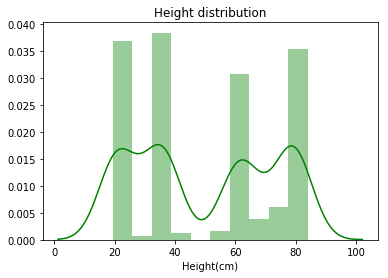

In [91]:
sns.distplot(data['Height(cm)'],bins=10,color='green').set_title('Height distribution')

Text(0.5, 1.0, 'Longevity distribution')

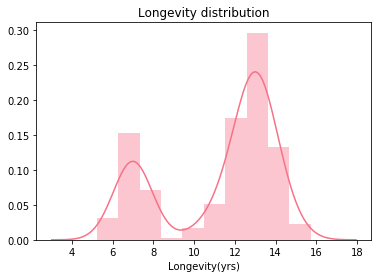

In [92]:
sns.set_palette("husl")
sns.distplot(data['Longevity(yrs)'],bins=10).set_title('Longevity distribution')


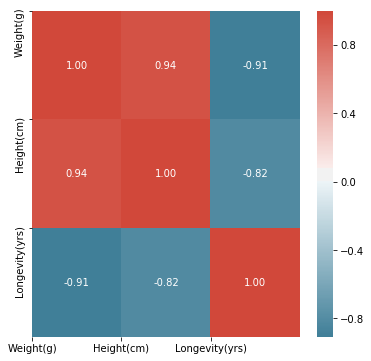

In [93]:
def heatMap(df):
    corr = df.corr()

    fig, ax = plt.subplots(figsize=(6, 6))
    #Generate Color Map, red & blue
    colormap = sns.diverging_palette(226, 15, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.show()
    
heatMap(data)

In [94]:
data.head(2)

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Beagle,10827.2179,35.601257,13.1740,med,high,short,male,Salinas
1,Great Dane,53560.1661,80.139200,6.5349,med,high,short,male,Mccarthy


## Normalising the data

It's important to have all the data on the same scale because if the scales for different features are wildly different, this can have a knock-on effect on the model's ability to learn (depending on what methods are used to do it). Ensuring standardised feature values implicitly weights all features equally in their representation.



In [95]:
value_columns = ['Weight(g)','Height(cm)','Longevity(yrs)']

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(data[value_columns])
df_normalized = pd.DataFrame(np_scaled,columns=value_columns)
df_normalized.head()

,Weight(g),Height(cm),Longevity(yrs)
0,0.145469,0.251220,0.756771
1,0.911438,0.940968,0.124301
2,0.095609,0.253220,0.809643
3,0.932759,0.919901,0.226234
4,0.155866,0.013902,0.700717


In [96]:
data[value_columns] = df_normalized
data.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
0,Beagle,0.145469,0.251220,0.756771,med,high,short,male,Salinas
1,Great Dane,0.911438,0.940968,0.124301,med,high,short,male,Mccarthy
2,Beagle,0.095609,0.253220,0.809643,med,high,short,female,Acevedo
3,Great Dane,0.932759,0.919901,0.226234,med,high,short,male,Scott
4,Daschhund,0.155866,0.013902,0.700717,high,med,short,female,Smith


#### One Hot Encoding

In [97]:
columns_one_hot_encode=['Sex']
prefixes =['sex']
data = pd.get_dummies(data,prefixes, columns=columns_one_hot_encode)


#### Factorisation

In [98]:
#factorize here

replace_dict_energy = {'low' : 'a_low', 'med':'b_med', 'high':'c_high'}
replace_dict_attention = {'low' : 'a_low', 'med' : 'b_med', 'high' : 'c_high'}
replace_dict_coat = {'short':'a_short', 'med': 'b_med','long' : 'c_long'}

replace_dict = {'Energy level' : replace_dict_energy,
               'Attention Needs' : replace_dict_attention,
               'Coat Lenght' : replace_dict_coat}

data.replace(replace_dict, inplace=True)


In [99]:
data.head(2)

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Owner Name,sex_female,sex_male
0,Beagle,0.145469,0.251220,0.756771,b_med,c_high,a_short,Salinas,0,1
1,Great Dane,0.911438,0.940968,0.124301,b_med,c_high,a_short,Mccarthy,0,1


In [100]:
FACTORISE_COLUMNS =['Attention Needs','Energy level','Coat Lenght']

In [101]:
for column in FACTORISE_COLUMNS:
    data[column] = pd.factorize(data[column], sort=True)[0]

In [102]:
data.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Owner Name,sex_female,sex_male
0,Beagle,0.145469,0.251220,0.756771,1,2,0,Salinas,0,1
1,Great Dane,0.911438,0.940968,0.124301,1,2,0,Mccarthy,0,1
2,Beagle,0.095609,0.253220,0.809643,1,2,0,Acevedo,1,0
3,Great Dane,0.932759,0.919901,0.226234,1,2,0,Scott,0,1
4,Daschhund,0.155866,0.013902,0.700717,2,1,0,Smith,1,0


In [103]:
#make a copy here
emergency_copy = data
data = data.drop(['Owner Name'], axis=1)
data_copy = data
data = data.drop(['Longevity(yrs)'], axis=1)

### One Hot Encoding the Breed Name

In [104]:
#pd.get_dummies(data,prefix='label', columns=['Breed Name'])
data = pd.get_dummies(data,prefix='label', columns=['Breed Name'])

In [105]:
X, Y = data[data.columns[:-4]],data[data.columns[-4:]]

## Splittting the data into train and test

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

The data seems to be easily separable as can be observed from the graph below.

Text(0.5, 0, 'Height')

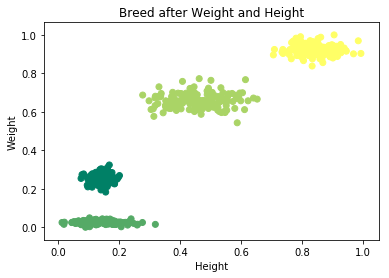

In [107]:
a = y_train.values
breed_classes_array = [np.where(r==1)[0][0] for r in a]

from matplotlib import *

fig, ax = plt.subplots()
points = ax.scatter(X_train['Weight(g)'], X_train['Height(cm)'], c=breed_classes_array,
                    cmap='summer')


ax.set_title("Breed after Weight and Height")
ax.set_ylabel("Weight")
ax.set_xlabel("Height")


# Logistic Regression

In [108]:
#LogisticRegression(penalty='l1',dual=False,max_iter=110)
log_reg = OneVsRestClassifier(LogisticRegression(penalty='l1',dual=False))
log_reg.fit(X_train,y_train)
predictions = log_reg.predict(X_test)
print("Logistic regression scores:")
print("Train:",log_reg.score(X_train,y_train))
print("Test:",log_reg.score(X_test,y_test))
print("Classification report:")
print(classification_report(y_test,log_reg.predict(X_test)))



Logistic regression scores:
Train: 0.9149253731343283
Test: 0.9424242424242424
Classification report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93        87
           1       1.00      1.00      1.00        81
           2       0.96      0.93      0.95        76
           3       1.00      1.00      1.00        86

   micro avg       0.97      0.97      0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330
 samples avg       0.96      0.97      0.96       330



/home/anca/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [109]:
print("\nHyperparameter tuning results: \n")

logistic_reg_hyperparameters = [
    {'reg' : 'l1', 'poly' : 1},
    {'reg' : 'l2', 'poly' : 1},
    {'reg' : 'l1', 'poly' : 2},
    {'reg' : 'l2', 'poly' : 2},
    {'reg' : 'l1', 'poly' : 3},
    {'reg' : 'l2', 'poly' : 3},
    {'reg' : 'l1', 'poly' : 4},
    {'reg' : 'l2', 'poly' : 4},
    {'reg' : 'l1', 'poly' : 5},
    {'reg' : 'l2', 'poly' : 5},
]

for index, model_conf in enumerate(logistic_reg_hyperparameters):
    
    poly = PolynomialFeatures(model_conf['poly'])
    X_train_poly = poly.fit_transform(X_train[X_train.columns[:2]])
    X_test_poly = poly.fit_transform(X_test[X_test.columns[:2]])
    
    X_train_poly = pd.concat([pd.DataFrame(X_train_poly).reset_index(), X_train.reset_index()], axis=1)
    X_test_poly = pd.concat([pd.DataFrame(X_test_poly).reset_index(), X_test.reset_index()], axis=1)
    
    log_model = OneVsRestClassifier(LogisticRegression(penalty=model_conf['reg'], random_state=42))
    log_model.fit(X_train_poly, y_train)
    predictions = log_model.predict(X_test_poly)
    logistic_reg_hyperparameters[index]['train_acc'] = log_model.score(X_train_poly, y_train)
    logistic_reg_hyperparameters[index]['test_acc'] = log_model.score(X_test_poly, y_test)
print(pd.DataFrame(logistic_reg_hyperparameters))


Hyperparameter tuning results: 

   poly reg  test_acc  train_acc
0     1  l1  0.924242   0.916418
1     1  l2  0.900000   0.892537
2     2  l1  0.969697   0.973134
3     2  l2  0.912121   0.917910
4     3  l1  0.972727   0.983582
5     3  l2  0.936364   0.940299
6     4  l1  0.978788   0.983582
7     4  l2  0.942424   0.950746
8     5  l1  0.984848   0.983582
9     5  l2  0.942424   0.961194


# Random Forest

In [110]:

rand_forest = RandomForestClassifier(random_state=0,max_depth=5)
rand_forest.fit(X_train,y_train)
print("\nRandom Forest scores:")
print("Train:",rand_forest.score(X_train,y_train))
print("Test:",accuracy_score(y_test,rand_forest.predict(X_test)))


Random Forest scores:
Train: 0.9985074626865672
Test: 0.996969696969697


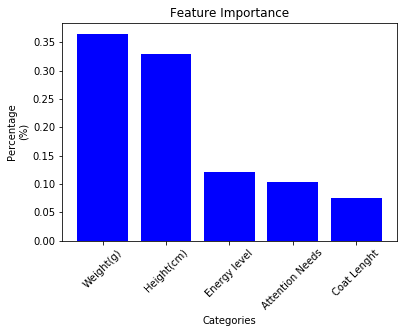

In [111]:
def plot_features(X_train,model):
    
    features = dict(zip(X_train.columns, model.feature_importances_))
    feature_dict = dict((k, v) for k, v in features.items() if v >= 0.01)
    names = list(feature_dict.keys())
    values = list(feature_dict.values())
    values = values
    
    plt.bar(names, values,color='blue')
    plt.xticks(rotation=45)
    plt.xlabel('Categories')
    plt.ylabel('Percentage\n(%)')
    plt.title('Feature Importance')
    plt.show()
    
    
#apelare
plot_features(X_train,rand_forest)

In [112]:
classes_names = rand_forest.classes_
feature_names = data.columns[:-4]
feature_names
estimator = rand_forest.estimators_[0]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = classes_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
Image(filename = 'tree.png')

In [113]:

rand_forest_hyperparameters = [
    {'n_estimators' : 10, 'criterion' : 'gini',   'max_depth':5,'poly':2},
    {'n_estimators' : 10, 'criterion' : 'entropy','max_depth':5,'poly':2},
    
    {'n_estimators' :  5, 'criterion' : 'gini',     'max_depth':5,'poly':2},
    {'n_estimators' : 5,  'criterion' : 'entropy',   'max_depth':5,'poly':2},
    
    {'n_estimators' : 10, 'criterion' : 'gini',    'max_depth':10,'poly':3},
    {'n_estimators' : 10, 'criterion' : 'entropy',   'max_depth':10,'poly':3},
    
    {'n_estimators' : 5, 'criterion' : 'gini',     'max_depth':5,'poly':3},
    {'n_estimators'  : 5,  'criterion' : 'entropy',   'max_depth':5,'poly':3}
  
]


In [114]:
for index,model_conf in enumerate(rand_forest_hyperparameters):
    poly = PolynomialFeatures(model_conf['poly'])
    X_train_poly = poly.fit_transform(X_train[X_train.columns[:2]])
    X_test_poly = poly.fit_transform(X_test[X_test.columns[:2]])
    
    X_train_poly = pd.concat([pd.DataFrame(X_train_poly).reset_index(),X_train.reset_index()],axis=1)
    X_test_poly = pd.concat([pd.DataFrame(X_test_poly).reset_index(),X_test.reset_index()],axis=1)
    
    rand_forest = RandomForestClassifier(random_state=0,n_estimators=model_conf['n_estimators'],criterion=model_conf['criterion'],max_depth=model_conf['max_depth'])
    rand_forest.fit(X_train_poly,y_train)
    
    rand_forest_hyperparameters[index]['train_acc'] = rand_forest.score(X_train_poly,y_train)
    rand_forest_hyperparameters[index]['test_acc'] = rand_forest.score(X_test_poly,y_test)
    #print(rand_forest.score(X_test_poly,y_test))
    
print(pd.DataFrame(rand_forest_hyperparameters))   

  criterion  max_depth  n_estimators  poly  test_acc  train_acc
0      gini          5            10     2   0.99697   1.000000
1   entropy          5            10     2   1.00000   1.000000
2      gini          5             5     2   0.99697   0.998507
3   entropy          5             5     2   1.00000   1.000000
4      gini         10            10     3   1.00000   1.000000
5   entropy         10            10     3   1.00000   1.000000
6      gini          5             5     3   1.00000   1.000000
7   entropy          5             5     3   1.00000   1.000000


# KNN

In [115]:
knn_model =  KNeighborsClassifier()
knn_model.fit(X_train,y_train)
print("\nKNeighborsClassifier scores")
print("Train:",knn_model.score(X_train,y_train))
print("Test:",accuracy_score(y_test, knn_model.predict(X_test)))


KNeighborsClassifier scores
Train: 0.9701492537313433
Test: 0.9818181818181818


In [116]:

knn_hyperparameters = [
    {'n_neighbors' : 5, 'weights':'uniform'},
    {'n_neighbors' : 5, 'weights':'distance'},
    
    {'n_neighbors' : 10, 'weights':'uniform'},
    {'n_neighbors' : 10, 'weights':'distance'},
    
    {'n_neighbors' : 7, 'weights':'uniform'},
    {'n_neighbors' : 7, 'weights':'distance'}
   

]

In [117]:


for index, conf in enumerate(knn_hyperparameters):
    poly = PolynomialFeatures(model_conf['poly'])
    
    
    knn_model = KNeighborsClassifier(n_neighbors=conf['n_neighbors'],weights=conf['weights'])
    knn_model.fit(X_train_poly,y_train)
    
    knn_hyperparameters[index]['train_acc'] = knn_model.score(X_train_poly,y_train)
    knn_hyperparameters[index]['test_acc'] = knn_model.score(X_test_poly,y_test)
    #print(rand_forest.score(X_test_poly,y_test))
    
print(pd.DataFrame(knn_hyperparameters)) 

   n_neighbors  test_acc  train_acc   weights
0            5  0.112121   0.265672   uniform
1            5  0.160606   1.000000  distance
2           10  0.006061   0.035821   uniform
3           10  0.081818   1.000000  distance
4            7  0.066667   0.146269   uniform
5            7  0.121212   1.000000  distance


In [118]:
emergency_copy.head()

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Owner Name,sex_female,sex_male
0,Beagle,0.145469,0.251220,0.756771,1,2,0,Salinas,0,1
1,Great Dane,0.911438,0.940968,0.124301,1,2,0,Mccarthy,0,1
2,Beagle,0.095609,0.253220,0.809643,1,2,0,Acevedo,1,0
3,Great Dane,0.932759,0.919901,0.226234,1,2,0,Scott,0,1
4,Daschhund,0.155866,0.013902,0.700717,2,1,0,Smith,1,0


In [119]:
emergency_copy.drop(['Owner Name', 'sex_female','sex_male'], axis=1, inplace=True)

The distribution graphs on the diagonal allow us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. For example, the left-most plot in the second row shows the scatter plot of HEIGHT versus WEIGHT.

We see from the third plot on the first row that Weight and Longevity are negatively correlated showing that dogs tend to live less as their weight increases.



<Figure size 432x288 with 0 Axes>

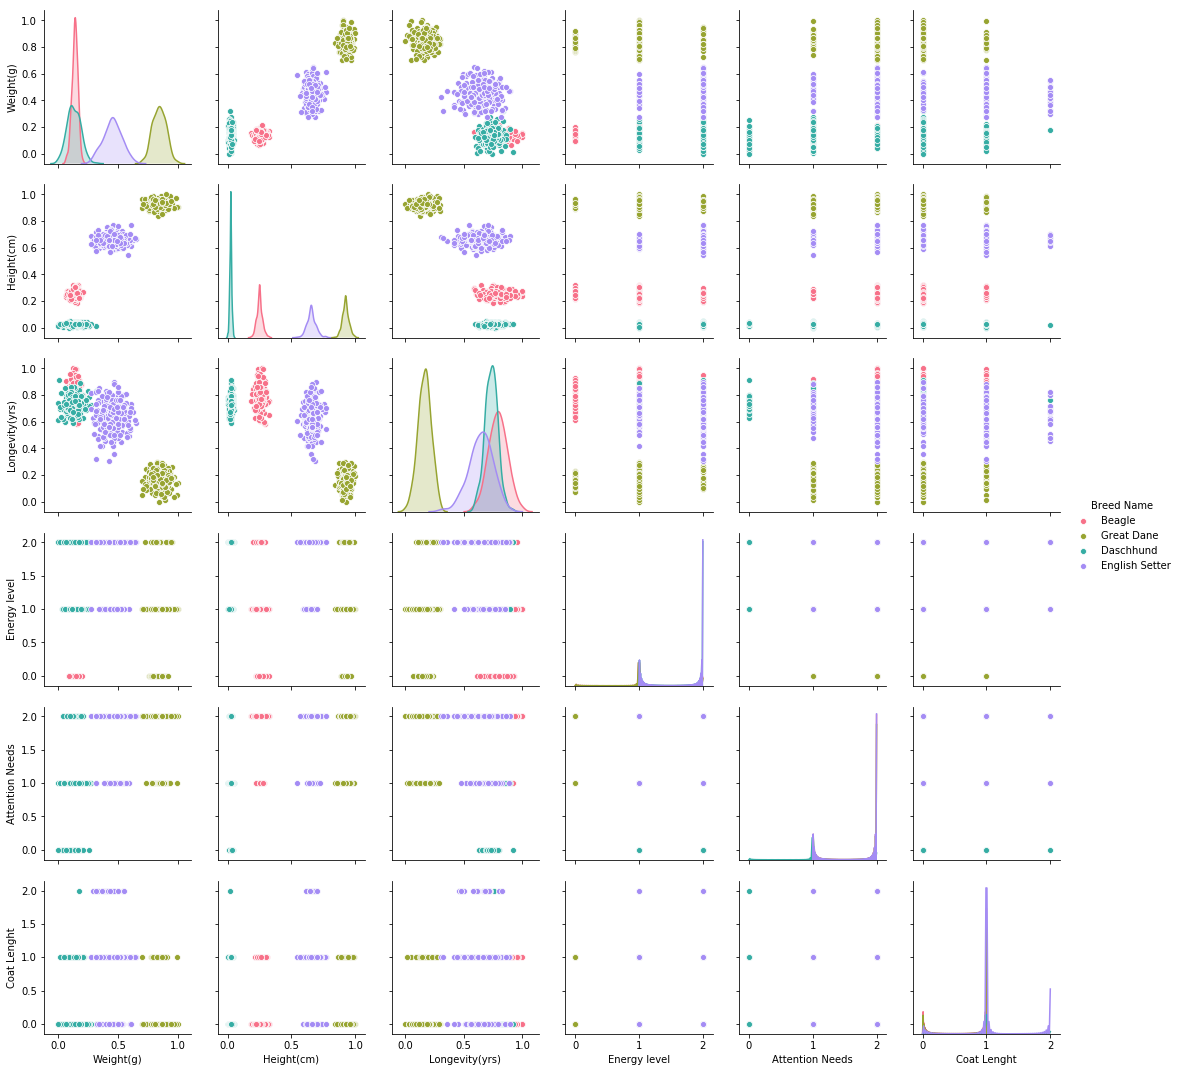

In [120]:
plt.figure()
sns.pairplot(emergency_copy, hue = "Breed Name",palette="husl")
plt.show()

In [121]:
print("Logistic Regression results with different hyperparameters")
print(pd.DataFrame(logistic_reg_hyperparameters))

print("\n\nKNN Classifier results with different hyperparameters\n")
print(pd.DataFrame(knn_hyperparameters))

print("\n\nRandom forest results with different hyperparameters\n")
print(pd.DataFrame(rand_forest_hyperparameters))

Logistic Regression results with different hyperparameters
   poly reg  test_acc  train_acc
0     1  l1  0.924242   0.916418
1     1  l2  0.900000   0.892537
2     2  l1  0.969697   0.973134
3     2  l2  0.912121   0.917910
4     3  l1  0.972727   0.983582
5     3  l2  0.936364   0.940299
6     4  l1  0.978788   0.983582
7     4  l2  0.942424   0.950746
8     5  l1  0.984848   0.983582
9     5  l2  0.942424   0.961194


KNN Classifier results with different hyperparameters

   n_neighbors  test_acc  train_acc   weights
0            5  0.112121   0.265672   uniform
1            5  0.160606   1.000000  distance
2           10  0.006061   0.035821   uniform
3           10  0.081818   1.000000  distance
4            7  0.066667   0.146269   uniform
5            7  0.121212   1.000000  distance


Random forest results with different hyperparameters

  criterion  max_depth  n_estimators  poly  test_acc  train_acc
0      gini          5            10     2   0.99697   1.000000
1   entropy    

#### The best model for ultimately classifying the dog breed seems to be Random Forest because it has the highest scores of all the models,performing accurately on the testing set also.

# Regression

In [122]:
data_copy = data_copy.drop(['Breed Name'], axis=1)
data_copy.head()

,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,sex_female,sex_male
0,0.145469,0.251220,0.756771,1,2,0,0,1
1,0.911438,0.940968,0.124301,1,2,0,0,1
2,0.095609,0.253220,0.809643,1,2,0,1,0
3,0.932759,0.919901,0.226234,1,2,0,0,1
4,0.155866,0.013902,0.700717,2,1,0,1,0


In [123]:
YR = data_copy['Longevity(yrs)']
XR = data_copy.drop(['Longevity(yrs)'], axis=1)
YR.head()


0    0.756771
1    0.124301
2    0.809643
3    0.226234
4    0.700717
Name: Longevity(yrs), dtype: float64

Running the dataset through a statistical model one can observe that the statistically significant features for predicting Longevity are only those with a p-value lower than 0.05 like Weight,Height and Energy Level.

R squared of 86% tells that 86% of the variation of Longevity is explained by the variation in the features of the model,the rest of 14% is due to factors unobserved by our dataset.


In [124]:

X2 = sm.add_constant(XR)
est = sm.OLS(YR, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:         Longevity(yrs)   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     1027.
Date:                Tue, 20 Nov 2018   Prob (F-statistic):               0.00
Time:                        23:17:47   Log-Likelihood:                 897.45
No. Observations:                1000   AIC:                            -1781.
Df Residuals:                     993   BIC:                            -1747.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5029      0.011     

In [125]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(XR, YR, test_size=0.33, random_state=42)

In [126]:


print("\nLinear Regression:\n")
linear_reg_model = LinearRegression(fit_intercept=True)
linear_reg_model.fit(X_train_r,y_train_r)
linear_reg_predictions = linear_reg_model.predict(X_test_r)

print("Coefficients:",linear_reg_model.coef_)
print("Intercept:",linear_reg_model.intercept_)


#Mean squared error regression loss
print("mean_squared_error :",mean_squared_error(y_test_r,linear_reg_predictions))
print("explained_variance_score:",explained_variance_score(y_test_r,linear_reg_predictions))

print("\nTrain R squared:",linear_reg_model.score(X_train_r, y_train_r))
print("Test R squared:",linear_reg_model.score(X_test_r, y_test_r))#R squared



Linear Regression:

Coefficients: [-0.77122796 -0.04722311  0.03334619  0.05261557  0.07240521 -0.00770253
  0.00770253]
Intercept: 0.7524743535614007
mean_squared_error : 0.009885651240220096
explained_variance_score: 0.8548041852149778

Train R squared: 0.8636248005462013
Test R squared: 0.8547900750082761




### Linear regression using polynomial features

In [127]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly.fit_transform(X_train_r)
X2_test_poly= poly.fit_transform(X_test_r)


linear_reg_model.fit(X2_poly,y_train_r)
linear_reg_predictions = linear_reg_model.predict(X2_test_poly)

print("Accuracy Score Train using polynomial features:",linear_reg_model.score(X2_poly, y_train_r))
print("Accuracy Score Test using polynomial features:",linear_reg_model.score(X2_test_poly, y_test_r))

Accuracy Score Train using polynomial features: 0.9081286121128411
Accuracy Score Test using polynomial features: 0.9000105027670406


### Eliminating statistically insignificant features

By analysing the scores obtained by using not only the 3 statistically significant features, but the others(Coat lenght,Attention Needs and Sex) also I have obtained an accuracy of only 90%.

After feature selection with only Height, Weight and Energy level and with polynomial features I have obtained almost the same score, 90%. In my opinion, a simpler model, with less features is more preferable than a complex one.

In [128]:


two_feat_df =XR[['Weight(g)','Height(cm)','Energy level']]
two_feat_df.head()
X_train_two, X_test_two, y_train_r, y_test_r = train_test_split(two_feat_df, YR, test_size=0.33, random_state=42)
X_train_two.head()

print("\nLinear Regression:\n")
linear_reg_model = LinearRegression(fit_intercept=True)
linear_reg_model.fit(X_train_two,y_train_r)
linear_reg_predictions = linear_reg_model.predict(X_test_two)
print("Train R squared:",linear_reg_model.score(X_train_two, y_train_r))

print("Test R squared:",linear_reg_model.score(X_test_two, y_test_r))#R squared
print("Coefficients:",linear_reg_model.coef_)
print("Intercept:",linear_reg_model.intercept_)


poly = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly.fit_transform(X_train_two)
X2_test_poly= poly.fit_transform(X_test_two)

linear_reg_model.fit(X2_poly,y_train_r)
linear_reg_predictions = linear_reg_model.predict(X2_test_poly)
print("Train R squared:",linear_reg_model.score(X2_poly, y_train_r))
linear_reg_test_score = linear_reg_model.score(X2_test_poly, y_test_r)
print("Test R squared:",linear_reg_model.score(X2_test_poly, y_test_r))#R squared




Linear Regression:

Train R squared: 0.8437209332645409
Test R squared: 0.8441910912126743
Coefficients: [-1.01102924  0.21242948  0.04786354]
Intercept: 0.8168412068920606
Train R squared: 0.9056013844919774
Test R squared: 0.9019970016602924


## Linear Regression with Regularisation

### Ridge

Regularization strength; must be a positive float.
Regularization improves the conditioning of the problem and reduces the variance of the estimates. 
Larger values specify stronger regularization. 
solver : {‘auto’, ‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’}

In [129]:
ridge_hyperparameters = [
    {'alpha' : 0.1, 'poly' : 1,'fit_intercept':'True'},
    {'alpha' : 0.5, 'poly' : 1,'fit_intercept':'True'},
    {'alpha' : 1.0, 'poly' : 1,'fit_intercept':'True'},
   
    
    {'alpha' : 0.1, 'poly' : 2,'fit_intercept':'True'},
    {'alpha' : 0.5, 'poly' : 2,'fit_intercept':'True'},
    {'alpha' : 1.0, 'poly' : 2,'fit_intercept':'True'},
    
    
    {'alpha' : 0.5, 'poly' : 3,'fit_intercept':'True'},
    {'alpha' : 1.5, 'poly' : 3,'fit_intercept':'True'},
    {'alpha' : 2.0, 'poly' : 3,'fit_intercept':'True'},
    
   
]

In [130]:
#ridge performs L2 regularisation

ridge = Ridge(random_state=0)
ridge.fit(X_train_two,y_train_r)

print(ridge.score(X_train_two,y_train_r))
print(ridge.score(X_test_two,y_test_r))
print(ridge.get_params)
print(ridge.coef_)

0.8410554763294231
0.8387410773707792
<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=0, solver='auto', tol=0.001)>
[-0.8795921   0.10529273  0.04756501]


In [131]:
for index, conf in enumerate(ridge_hyperparameters):
    
    poly = PolynomialFeatures(conf['poly'])
    X_train_poly = poly.fit_transform(X_train_two)
    X_test_poly = poly.fit_transform(X_test_two)

    ridge_model = Ridge(alpha=conf['alpha'],fit_intercept=conf['fit_intercept'],random_state=0)
    ridge_model.fit(X_train_poly, y_train_r)
    ridge_hyperparameters[index]['train_acc'] = ridge_model.score(X_train_poly, y_train_r)
    ridge_hyperparameters[index]['test_acc'] = ridge_model.score(X_test_poly, y_test_r)
print(pd.DataFrame(ridge_hyperparameters))

   alpha fit_intercept  poly  test_acc  train_acc
0    0.1          True     1  0.843831   0.843683
1    0.5          True     1  0.841875   0.842912
2    1.0          True     1  0.838741   0.841055
3    0.1          True     2  0.902900   0.905102
4    0.5          True     2  0.901281   0.902631
5    1.0          True     2  0.898945   0.899952
6    0.5          True     3  0.904090   0.904998
7    1.5          True     3  0.904283   0.903856
8    2.0          True     3  0.904235   0.903396


 #### Lasso Regression


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [133]:
#A constant model that always predicts the expected value of y, disregarding the input features, 
#would get a R^2 score of 0.0.

In [134]:


lasso = Lasso()
lasso.fit(X_train_two,y_train_r)
print("Lasso Train score:",lasso.score(X_train_two,y_train_r))
print("Lasso Test score:",lasso.score(X_test_two,y_test_r))


Lasso Train score: 0.0
Lasso Test score: -0.0013093050501824521


# KNN REGRESSOR

In [135]:

poly = PolynomialFeatures(degree=2, include_bias=False)
X2_poly = poly.fit_transform(X_train_r)
X2_test_poly= poly.fit_transform(X_test_r)

kn_regressor = KNeighborsRegressor(n_neighbors=5)
kn_regressor.fit(X_train_r,y_train_r)


print("KNN Regressor Train score:",kn_regressor.score(X_train_r,y_train_r))
print("KNN Regressor Test score:",kn_regressor.score(X_test_r,y_test_r))

kn_regressor.fit(X2_poly,y_train_r)
print("KNN Regressor Polynomial features Train score:",kn_regressor.score(X2_poly,y_train_r))
print("KNN Regressor Polynomial featuresTest score:",kn_regressor.score(X2_test_poly,y_test_r))

KNN Regressor Train score: 0.907763243054572
KNN Regressor Test score: 0.8902603878629312
KNN Regressor Polynomial features Train score: 0.9133483396376855
KNN Regressor Polynomial featuresTest score: 0.8967537212233558


In [136]:
print("Linear Regression Test Score:",linear_reg_test_score)#R squared
print("Ridge different hyperparameters scores:\n",pd.DataFrame(ridge_hyperparameters))


Linear Regression Test Score: 0.9019970016602924
Ridge different hyperparameters scores:
    alpha fit_intercept  poly  test_acc  train_acc
0    0.1          True     1  0.843831   0.843683
1    0.5          True     1  0.841875   0.842912
2    1.0          True     1  0.838741   0.841055
3    0.1          True     2  0.902900   0.905102
4    0.5          True     2  0.901281   0.902631
5    1.0          True     2  0.898945   0.899952
6    0.5          True     3  0.904090   0.904998
7    1.5          True     3  0.904283   0.903856
8    2.0          True     3  0.904235   0.903396


As for regression I believe the best model for predicting the Longevity is the simple Linear Regression which has an accuracy of 90%. It seems that regression with regularisation has the same score.